#  Convolutional Neural Networks

## Deep Learning Project 5: Image Classification
---


In this project, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the CIFAR-10 dataset. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

## Exercise 1: Simple CNN

Let's start by importing necesssary libraries

In [23]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

### Load dataset:
### Load Data: CIFAR-10 dataset


We will use the CIFAR-10 dataset.The dataset consists of 60000 images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. Each sample is a 32x32 pixels color image, associated with a label from 10 classes:

```
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
```

Each pixel intensity is represented by a `uint8` (byte) from 0 to 255.
We will divide the dataset in training, testing and validation set. As you already know, the training set will be used to train the model, the validation set will be used to perform model selection and finally, the test set will be used to asses the performance of deep network.

Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in grey scale image is just one and in color images is 3). Therefore, if you are using grayscale images use [tf.expand_dims](https://www.tensorflow.org/api_docs/python/tf/expand_dims#:~:text=Used%20in%20the%20notebooks,-Used%20in%20the&text=This%20operation%20is%20useful%20to,to%20a%20tensor%20of%20scalars) to transform each image from a matrix to a 3-dimensional tensor. Finally, we have to normalize the input data.

In [24]:
cifar_10 = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = (
    cifar_10.load_data()) # The dataset is already divede in test and training

# We extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]


Let's take a look at a sample of the images in the dataset:

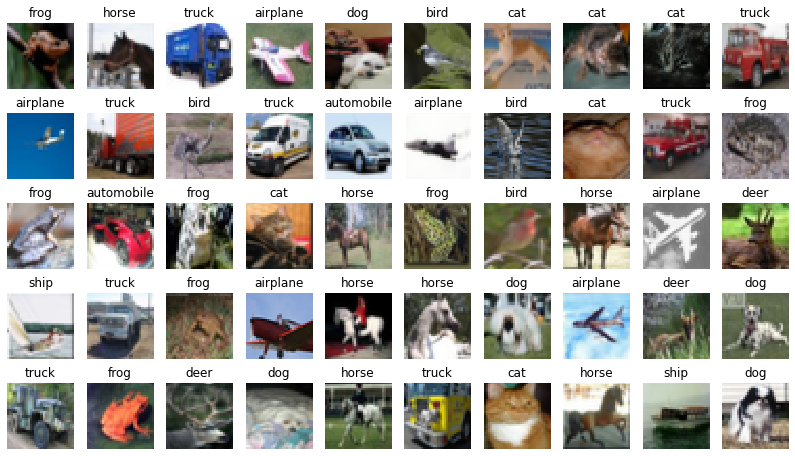

In [25]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index][0]])
plt.show()

### Input Normalization:

When using Gradient Descent, it is usually a good idea to ensure that all the features have a similar scale. Try to standardize the pixel values.

In [26]:
#Define X_train_scaled, X_valid_scaled and X_test_scaled, the sets that contains 
#Hint: For each feature (pixel intensity), we must subtract the mean() of that 
#feature (across all instances, so use axis=0) and divide by its standard 
#deviation (std(), again axis=0)


mean = np.mean(X_train, axis=0)
st_dev = np.std(X_train, axis=0)

X_train = (X_train - mean) / st_dev
X_valid = (X_valid - mean) / st_dev
X_test = (X_test - mean) / st_dev


#Add one dimension to manage the channel if you are using grayscale images.
#X_train=tf.expand_dims(X_train, 3) 
#X_valid=tf.expand_dims(X_valid, 3) 
#X_test=tf.expand_dims(X_test,3)

#Make sure you compute the means and standard deviations on the training set,
#and use these statistics to scale the training set, the validation set and the test set

### Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function to ensure that the sum of all the estimated class probabilities for each image is equal to 1.
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [27]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])


Print the model summary

In [28]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 8192)              0         
                                                                 
 dense_7 (Dense)             (None, 10)                81930     
                                                                 
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters mostly depends on the output layers, indeed the parameter sharing techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model.

In [29]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
352/352 [==============================] - 11s 31ms/step - loss: 1.4537 - accuracy: 0.4922 - val_loss: 1.2587 - val_accuracy: 0.5674
Epoch 2/10
352/352 [==============================] - 15s 41ms/step - loss: 1.1480 - accuracy: 0.6049 - val_loss: 1.1558 - val_accuracy: 0.6010
Epoch 3/10
352/352 [==============================] - 15s 42ms/step - loss: 1.0266 - accuracy: 0.6462 - val_loss: 1.0529 - val_accuracy: 0.6388
Epoch 4/10
352/352 [==============================] - 15s 42ms/step - loss: 0.9514 - accuracy: 0.6730 - val_loss: 1.0510 - val_accuracy: 0.6506
Epoch 5/10
352/352 [==============================] - 12s 34ms/step - loss: 0.9035 - accuracy: 0.6887 - val_loss: 1.0468 - val_accuracy: 0.6402
Epoch 6/10
352/352 [==============================] - 12s 33ms/step - loss: 0.8617 - accuracy: 0.7056 - val_loss: 1.0335 - val_accuracy: 0.6468
Epoch 7/10
352/352 [==============================] - 12s 34ms/step - loss: 0.8294 - accuracy: 0.7127 - val_loss: 1.0248 - val_accuracy:

Plot the loss and the accuracy trends for the training and validation set. Then, compute the result on the test set.

313/313 - 1s - loss: 1.0269 - accuracy: 0.6519 - 1s/epoch - 4ms/step
accuracy: 65.19%


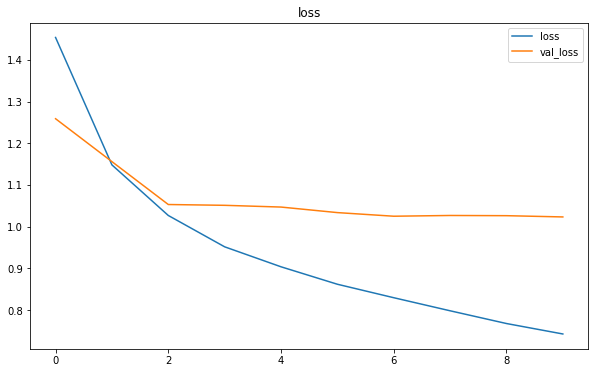

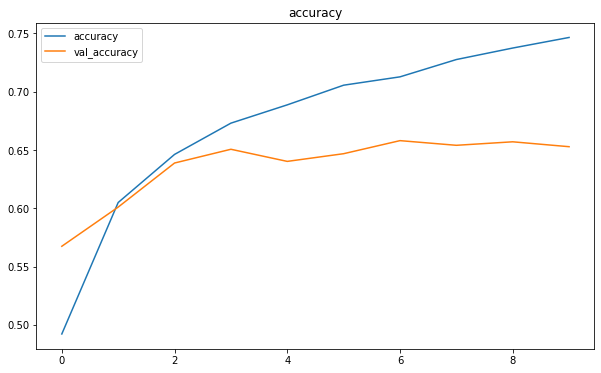

In [30]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'], label='loss')
  plt.plot(history.epoch,history.history['val_loss'],label='val_loss')
  plt.title('loss')
  plt.legend()
  
def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'],label='accuracy')
  plt.plot(history.epoch,history.history['val_accuracy'],label='val_accuracy')
  plt.title('accuracy')
  plt.legend()
  
plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



### Visualize Weights

An interesting thing to do is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

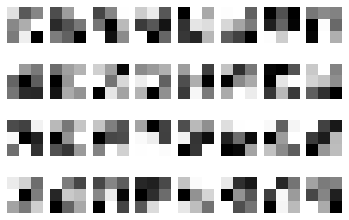

In [31]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

### Deep CNN
Let's consider a deeper model, more precily in this project we consider a model composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 
* One 2D convolutional layer with kernel size 2x2 and 16 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function


In [32]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 14, 14, 16)        2064      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 7, 7, 16)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 10)               

### Explain in this cell: 

1.   how the number of parameters on each of the two Conv2D layers is determined;
2.   the reasons why the two considered convolutional layers have a different number of parameters.

### EXPLANATION:


1.   The number of parameters in the 2D convolution layer depends on the size of the kernel size. The kernel is a filter that is applied to the channels of the input image. To perform a convolution, We need to learn a kernel for each input image channel, in order to apply a convolution on the entire image to compute each output channel. For this reason, We need to learn different kernels for each different output dimension. The image size does not affect the number of parameters because they are shared for each convolution computed on the same channel. The number of parameters for each convolution layer is determined by the following formula: , where  is the bias. So:
- The number of the parameters for the first layer is
32 . (3.3.3 + 1) = 896
- The number of the parameters for the second layer is
16 . (32.2.2 + 1) = 2064


2.   The two convolutional layers have a different number of parameters because the input and output channels of the image and the kernel size change. Starting from this point, we can notice:

For the first layer, it has a 3x3 kernel size, an input image with 1 channel and it produces in ouput an image with 32 channels;

For the second layer, it has a 2x2 kernel size, an input image with 32 channels and it produces in output an image with 16 channels.

Let's now train our deep CNN.

Epoch 1/10
352/352 [==============================] - 14s 38ms/step - loss: 1.6165 - accuracy: 0.4223 - val_loss: 1.3728 - val_accuracy: 0.5138
Epoch 2/10
352/352 [==============================] - 14s 39ms/step - loss: 1.2952 - accuracy: 0.5446 - val_loss: 1.2216 - val_accuracy: 0.5660
Epoch 3/10
352/352 [==============================] - 14s 39ms/step - loss: 1.1756 - accuracy: 0.5896 - val_loss: 1.1404 - val_accuracy: 0.6032
Epoch 4/10
352/352 [==============================] - 14s 39ms/step - loss: 1.0889 - accuracy: 0.6222 - val_loss: 1.0793 - val_accuracy: 0.6240
Epoch 5/10
352/352 [==============================] - 14s 40ms/step - loss: 1.0352 - accuracy: 0.6412 - val_loss: 1.0523 - val_accuracy: 0.6324
Epoch 6/10
352/352 [==============================] - 14s 39ms/step - loss: 0.9962 - accuracy: 0.6586 - val_loss: 1.0103 - val_accuracy: 0.6408
Epoch 7/10
352/352 [==============================] - 14s 40ms/step - loss: 0.9680 - accuracy: 0.6646 - val_loss: 1.0070 - val_accuracy:

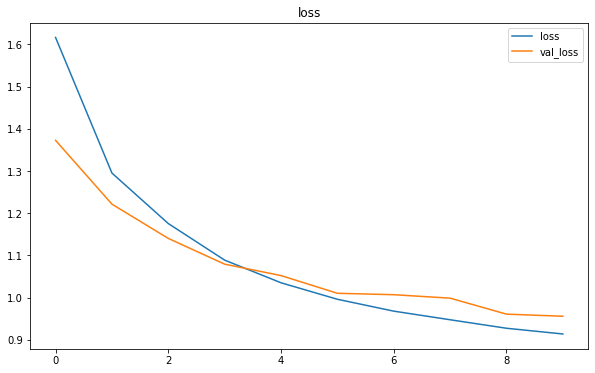

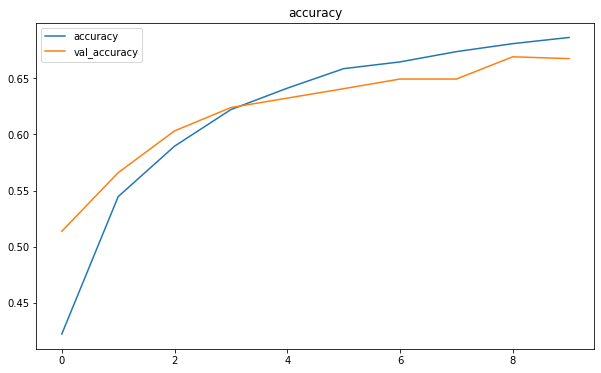

In [33]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

## Exercise 2: Develop a better CNN
Let's develop a network that performs better than the very simple one above. This exercise aims to explore how much the various hyper-parameters influence the classification capability of the model. 

Our task is to modify some of the hyper-parameters of the previous exercise's network and compare the results. At least one of the models you try should have an improvement in the test set results (generalization) over the result of the model used in the previous exercise.
In the cell below we will report only the code of the **best model** that we can find. In addtion, print out its result on the test set, and plot the accuracy and the loss trends in the notebook we return.
Moreover, for each setup we test, analyze and discuss the obtained results briefly in the last cells at the bottom.

Hint: Each reparameterization should change a different aspect in the network, while the rest of the parameters would stay the same. 
Example parameters to try to change (we suggest to test at least one re-parametrization for each of these categories):

*    number of layers or neurons or filters dimension
*   activation functions
*   epochs
*   batch sizes
*   optimizer, see TensorFlow documentation on [optimizers](https://https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   max-pooling on/off on certain layers, or pool size

For what concerns the optimizer, as you can see in the 'compile' method [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) is it possible to pass as 'optimizer ' attribute's value a string (the name of optimizer) or an optimizer instance.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.

In [40]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3, 3], activation="relu", input_shape=[32, 32, 3]),
    keras.layers.MaxPool2D(pool_size=[2, 2]),
    keras.layers.Conv2D(filters=32, kernel_size=[2, 2], activation="relu"),
    keras.layers.MaxPool2D(pool_size=[2, 2]),
    keras.layers.Conv2D(filters=64, kernel_size=[2, 2], activation="relu"),
    keras.layers.MaxPool2D(pool_size=[2, 2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
  

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 14, 14, 32)        4128      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 6, 6, 64)          8256      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 3, 3, 64)       

Epoch 1/50
352/352 [==============================] - 15s 41ms/step - loss: 1.5774 - accuracy: 0.4362 - val_loss: 1.3316 - val_accuracy: 0.5312
Epoch 2/50
352/352 [==============================] - 20s 56ms/step - loss: 1.2354 - accuracy: 0.5661 - val_loss: 1.1538 - val_accuracy: 0.6044
Epoch 3/50
352/352 [==============================] - 19s 53ms/step - loss: 1.1030 - accuracy: 0.6166 - val_loss: 1.0519 - val_accuracy: 0.6368
Epoch 4/50
352/352 [==============================] - 19s 55ms/step - loss: 1.0231 - accuracy: 0.6454 - val_loss: 1.0257 - val_accuracy: 0.6450
Epoch 5/50
352/352 [==============================] - 19s 54ms/step - loss: 0.9607 - accuracy: 0.6696 - val_loss: 0.9691 - val_accuracy: 0.6676
Epoch 6/50
352/352 [==============================] - 29s 81ms/step - loss: 0.9165 - accuracy: 0.6831 - val_loss: 0.9538 - val_accuracy: 0.6736
Epoch 7/50
352/352 [==============================] - 29s 83ms/step - loss: 0.8763 - accuracy: 0.7002 - val_loss: 0.9179 - val_accuracy:

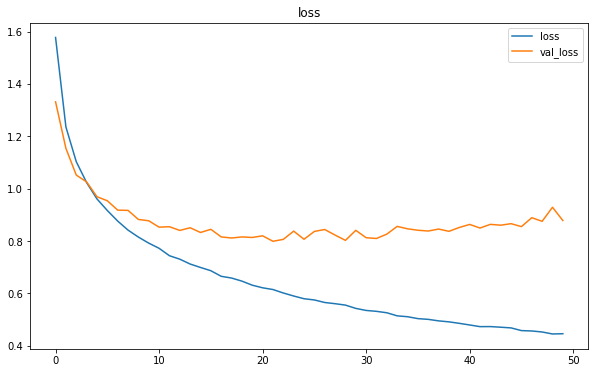

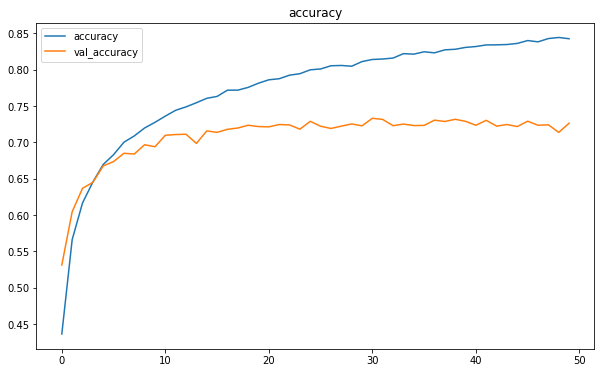

In [41]:
history = model.fit(X_train, y_train, epochs=50, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

### Example of tests discussion
The best model that I found has the following layers and hyperparameters:
Conv2D layer with:
* 32 filters
* 3x3 kernel size
* ReLU as activation function

MaxPool2D layer with 2x2 as pool size

Conv2D layer with:
* 32 filters
* 2x2 kernel size
* ReLU as activation function

MaxPool2D layer with 2x2 as pool size

Conv2D layer with:
* 64 filters
* 2x2 kernel size
* ReLU as activation function

MaxPool2D layer with 2x2 as pool size

Flatten

Dense layer with:
* 10 neurons (one for each class)
* Softmax as activation function

Optimizer: Adam

Batch size: 128

Epochs: 50

The achieved accuracy in the test set is 71.59% with a loss value of 0.9548

Discussion:
Through this model the accuracy decreased by 4.94% and the loss decreased by 0.0143. The main reason of this improvement is given by the increase of epochs and changing the number of filters. The default epoch value of the initial model does not allow the network to learn sufficiently from the training set. These two main reason effected my results.

Besides, I tested also other models: 
### Model 1: change the optimizer from Adam to SGD
Conv2D layer with:
* 32 filters
* 3x3 kernel size
* ReLU as activation function

MaxPool2D layer with 2x2 as pool size

Conv2D layer with:
* 16 filters
* 3x3 kernel size
* ReLU as activation function

MaxPool2D layer with 2x2 as pool size

Flatten

Dense layer with:
* 10 neurons (one for each class)
* Softmax as activation function

Epochs: 10

Batch size: 128

Optimizer: SGD

Result:
* Accuracy: 61.67%
* Loss: 1.3218

### Model 2: change the epochs from 10 to 30
Conv2D layer with:
* 32 filters
* 3x3 kernel size
* ReLU as activation function

MaxPool2D layer with 2x2 as pool size

Conv2D layer with:
* 16 filters
* 3x3 kernel size
* ReLU as activation function

MaxPool2D layer with 2x2 as pool size

Flatten

Dense layer with:
* 10 neurons (one for each class)
* Softmax as activation function

Epochs: 30

Batch size: 128

Optimizer: SGD

Result:
* Accuracy: 64.67%
* Loss: 1.0316


### Model 3: increase the number of layers/filters/epochs
Conv2D layer with:
* 32 filters
* 3x3 kernel size
* ReLU as activation function

MaxPool2D layer with 2x2 as pool size

Conv2D layer with:
* 64 filters
* 3x3 kernel size
* ReLU as activation function

MaxPool2D layer with 2x2 as pool size

Conv2D layer with:
* 64 filters
* 3x3 kernel size
* ReLU as activation function

MaxPool2D layer with 2x2 as pool size

Flatten

Dense layer with:
* 10 neurons (one for each class)
* Softmax as activation function

Epochs: 50

Batch size: 128

Optimizer: SGD

Result:
* Accuracy: 66.67%
* Loss: 1.2376



### Model 4: change the optimizer from SGD to Adam
Conv2D layer with:
* 32 filters
* 3x3 kernel size
* ReLU as activation function

MaxPool2D layer with 2x2 as pool size

Conv2D layer with:
* 32 filters
* 2x2 kernel size
* ReLU as activation function

MaxPool2D layer with 2x2 as pool size

Conv2D layer with:
* 64 filters
* 2x2 kernel size
* ReLU as activation function

MaxPool2D layer with 2x2 as pool size

Flatten

Dense layer with:
* 10 neurons (one for each class)
* Softmax as activation function

Optimizer: Adam

Batch size: 128

Epochs: 50

Result:
* Accuracy: 71.59%
* Loss: 0.9548




Discussion:
Increasing the epochs value has been a good choice. But when I increased the epochs value to 150 I noticed that the model tended to overfit.
My 4th model is the best model.Changing from SGD to Adam produced an accuracy near to the first model. Adam is a better optimizer because it uses an adaptive learning and momentum techniques. Because firstly I used SGD optimizer in my models.

I also tried some other models but they were not necessary to use because the results were worse than these 4 models which I used above. For instance, I changed batch size but accuracy decreased and also I tried Sigmoid activation function instead of ReLu however the accuracy didn't change much. Therefore I decided to don't change these hyper-parameters. 

